In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from scipy.fft import fft, ifft

In [2]:
data = pd.read_csv("franck-hertz-Hg.csv")
data.head()

,Time (s) Run #2,"Current, Ch A (A) Run #2","Voltage, Ch B (V) Run #2","Voltage, Ch C (V) Run #2"
0,0.00,1.360000e-14,-0.3,-0.002
1,0.05,2.030000e-14,-0.3,-0.002
2,0.10,2.600000e-14,-0.3,-0.002
3,0.15,2.640000e-14,-0.3,-0.003
4,0.20,1.540000e-14,-0.3,-0.002


In [3]:
def smooth_data_fourier(data, cutoff_frequency=0.1):
    # Perform FFT
    sp = fft(data)
    
    # Filter out high frequencies
    frequencies = np.fft.fftfreq(len(sp))
    sp[np.abs(frequencies) > cutoff_frequency] = 0
    
    # Perform IFFT
    smoothed_data = np.real(ifft(sp))
    return smoothed_data

In [4]:
voltage = data["Voltage, Ch B (V) Run #2"].to_numpy()
current = -1 * data["Current, Ch A (A) Run #2"].to_numpy()

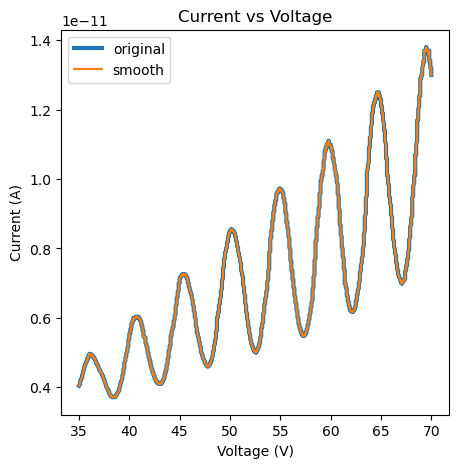

In [108]:
current_smooth = smooth_data_fourier(current[1258:], cutoff_frequency=1)
voltage_smooth = voltage[1258:]
plt.figure(figsize=(5,5))
plt.plot(voltage[1258:], current[1258:], lw=3, label="original")
plt.plot(voltage_smooth, current_smooth, lw=1.5, label="smooth")
plt.title("Current vs Voltage")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.legend()

In [51]:
peaks, _ = find_peaks(current_smooth, height=0.2e-11, distance=5, prominence=1e-12)
peaks = peaks[:-1]
print(peaks)
print(len(voltage_smooth))

[  59  220  521  799 1094 1462 1844 2303]
2481


In [52]:
voltage_peaks = voltage_smooth[peaks]

a (Contact Potentials): 4.780952380952379, b (First Excitation Potential): 31.135714285714293


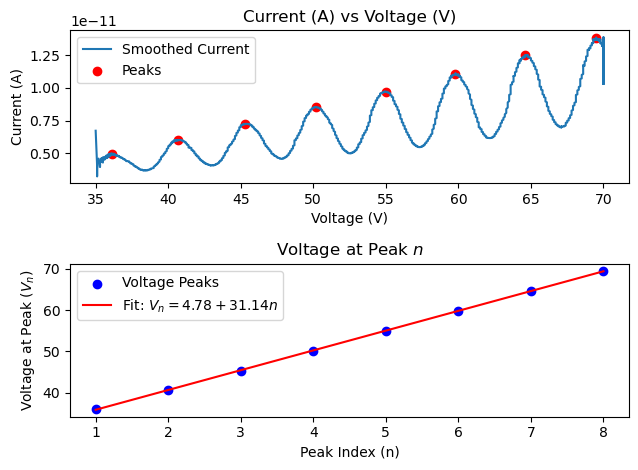

peak number, voltage, current
1 36.1 4.9915174099175464e-12
2 40.7 6.0320983261711265e-12
3 45.3 7.2602619304379495e-12
4 50.2 8.544768371045355e-12
5 55.0 9.715429218832748e-12
6 59.8 1.1098647423995831e-11
7 64.6 1.251357315279882e-11
8 69.5 1.3832842617568278e-11


In [56]:
# Create an array of indices n, starting from 1
n_values = np.arange(1, len(peaks) + 1)

# Perform least squares fit
coefficients = np.polyfit(n_values, voltage_peaks, 1)
a, b = coefficients
print(f"a (Contact Potentials): {a}, b (First Excitation Potential): {b}")

# Plot original and smoothed current data
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(voltage_smooth, current_smooth, label='Smoothed Current')
plt.scatter(voltage_smooth[peaks], current_smooth[peaks], color='red', label='Peaks')
plt.title("Current (A) vs Voltage (V)")
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.legend()

# Plot the least squares fit
plt.subplot(2, 1, 2)
plt.scatter(n_values, voltage_peaks, label='Voltage Peaks', color='blue')
fit = np.polyval(coefficients, n_values)
plt.plot(n_values, fit, label=f'Fit: $V_n = {a:.2f} + {b:.2f}n$', color='red')
plt.xlabel('Peak Index (n)')
plt.ylabel('Voltage at Peak ($V_n$)')
plt.title("Voltage at Peak $n$")
plt.legend()

plt.tight_layout()
plt.show()

print("peak number, voltage, current")
for i in range(len(peaks)):
    print(i+1, voltage_smooth[peaks[i]], current_smooth[peaks[i]])

In [57]:
e = 1.602e-19
d = .00058
L = .008
V_a = 70
energy_blue = (e * d * V_a)/L
print(energy_blue)

8.130150000000001e-19


In [63]:
def d_of_v_a(V_blue, V_a, L):
    return ((V_blue)/(V_a))*L

nums = np.linspace(1, 70, 100)
values = []
for n in nums:
    values.append(d_of_v_a(5.075, n, L))
values = np.array(values)
print(values*1000)

[40.6        23.925      16.95949367 13.13529412 10.7184      9.0527027
  7.83508772  6.90618557  6.17419355  5.5825      5.09429658  4.68461538
  4.33592233  4.03554217  3.77408451  3.54444444  3.34114713  3.15990566
  2.99731544  2.8506383   2.71764706  2.59651163  2.48571429  2.38398577
  2.29025641  2.20361842  2.12329635  2.04862385  1.97902511  1.914
  1.85311203  1.79597855  1.74226268  1.69166667  1.64392638  1.59880668
  1.55609756  1.51561086  1.47717751  1.44064516  1.40587618  1.3727459
  1.34114114  1.3109589   1.28210526  1.25449438  1.22804766  1.202693
  1.17836412  1.155       1.13254438  1.11094527  1.0901546   1.0701278
  1.05082353  1.03220339  1.01423164  0.996875    0.98010241  0.96388489
  0.94819533  0.93300836  0.91830021  0.90404858  0.89023256  0.87683246
  0.86382979  0.85120712  0.83894803  0.82703704  0.81545953  0.80420168
  0.79325044  0.78259346  0.77221902  0.76211604  0.752274    0.74268293
  0.73333333  0.72421622  0.71532301  0.70664557  0.69817613 

Text(0.5, 0, '$V_{acc}$ (V)')

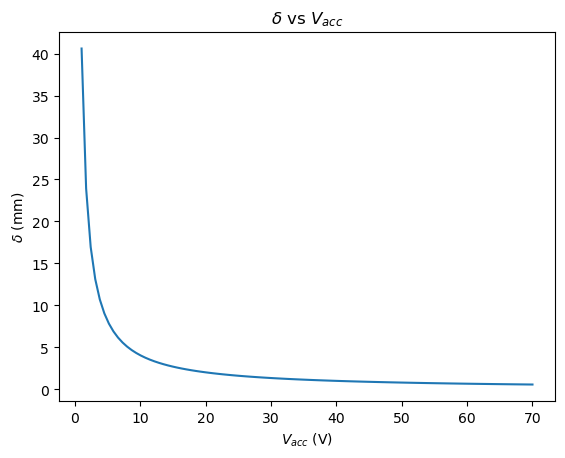

In [73]:
plt.plot(nums, (values*1000))
plt.title("$\delta$ vs $V_{acc}$")
plt.ylabel("$\delta$ (mm)")
plt.xlabel("$V_{acc}$ (V)")